In [1]:
import numpy as np

data = np.genfromtxt('basketball.csv', delimiter=',')[1:]
X = data[:, :4]
y = data[:, 4]

1. Реализация алгоритма ridge-регрессии (формулы взяты из лекций Воронцова):

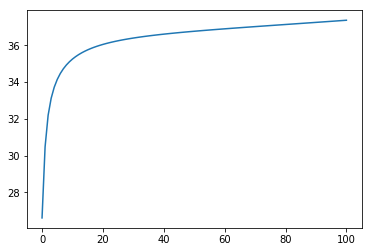

In [5]:
from matplotlib import pyplot as plt

taus = list(range(101))
V, d, Ut = np.linalg.svd(X, full_matrices=False)
mses = []
for tau in taus:
    y_pred = V.dot(np.diag(d / (d + tau))).dot(V.T).dot(y)
    mses.append(((y_pred - y) ** 2).mean())
plt.plot(taus, mses)

Выведем отдельно наименьшую среднеквадратичную ошибку (mse) и искомый вектор весов для нее:

In [18]:
tau = 0
w = Ut.T.dot(np.diag(d / (d ** 2 + tau))).dot(V.T).dot(y)
mse = ((X.dot(w) - y) ** 2).mean()
print('w = {}'.format(w))
print('mse = {}'.format(mse))

w = [-3.04634035e+00  4.47411947e-03  4.82210324e+01  1.24703504e+01]
mse = 26.607689631709484


2. Регрессия с функцией потерь $L(h,(x,y))=|h(x)−y|$
<br/>Задачу минимизации эмпирического риска в линейной регрессии функцией потерь $L(h,(x,y))=|h(x)−y|$ можно представить, как следующую задачу линейного программирования:
$$min_{w}\sum_{i=0}^m|wx_i-y_i|$$
То же самое в матричном виде:
$$min_{w}||Xw-y||_1$$
Она, в свою очередь сводится к задаче линейного программирования:
<center>
<br/>minimize $1^Tt$
<br/>subject to $-t \leq Xw-y \leq t$
</center>
<br/>То же самое:
<center>
<br/>minimize $1^Tt$
<br/>subject to $\left\lgroup \matrix{X & -I\cr -X & I} \right\rgroup 
\left\lgroup \matrix{w\cr t} \right\rgroup \leq
\left\lgroup \matrix{y\cr-y} \right\rgroup $
</center>

In [19]:
from scipy.optimize import linprog

m, n = X.shape
A = np.concatenate((np.concatenate([X, -np.eye(m)], axis=1), np.concatenate([-X, -np.eye(m)], axis=1)))
b = np.concatenate([y, -y])
c = np.concatenate([np.zeros(n), np.ones(m)])
result = linprog(c, A, b)
w = result.x[:n]
mse = ((X.dot(w) - y)**2).mean()
print('w = {}'.format(w))
print('mse = {}'.format(mse))

w = [ 0.         0.         5.3720284 10.9138623]
mse = 32.75954567607067


Как видим, среднеквадратичная ошибка mse у ridge-регресссии меньше, зато регрессия, основанная на методе наименьших модулей позволяет отобрать наиболее информативные признаки.
<br/>Метод наименьших модулей из 2 модели предпочтительнее использовать в случаях, когда шум в данных подчиняется распределению Лапласа, а ridge-регрессию, когда шум гауссовский.